In [109]:
from qiskit import *
import numpy as np
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-04-11 02:02:01,407: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [147]:
#Initial position in grid
i=0
j=0

#Creates grid
grid=np.matrix([[2,1,1,1,1],
                [0,1,1,1,1],
                [0,0,0,1,1],
                [1,1,0,0,0]])
    
print(grid)


[[2 1 1 1 1]
 [0 1 1 1 1]
 [0 0 0 1 1]
 [1 1 0 0 0]]


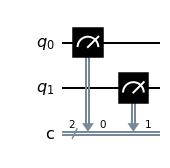

In [155]:
#Quantum circuit
cr=ClassicalRegister(2,'c')
qr=QuantumRegister(2,'q')

circuit= QuantumCircuit(qr, cr)

#circuit.x(1)


circuit.measure(qr,cr)

circuit.draw(output='mpl')

In [156]:
simulator=BasicAer.get_backend('qasm_simulator')

In [157]:
compiled_circuit = transpile(circuit, simulator)

#initialize dictonary
counts= {
  "00": 0,
  "01": 0,
  "10": 0,
  "11": 0
}

# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count:",counts)

# Draw the circuit
circuit.draw()


Total count: {'00': 1000}


┌─┐   
q_0: ┤M├───
     └╥┘┌─┐
q_1: ─╫─┤M├
      ║ └╥┘
c: 2/═╩══╩═
      0  1

In [159]:
max_counts=900

#Makes sure to get every state in the dictionary (even if it has 0 counts)
counts['00']=counts.get('00', 0)
counts['01']=counts.get('01', 0)
counts['10']=counts.get('10', 0)
counts['11']=counts.get('11', 0)

#print(counts['00'])
#print(counts['01'])
#print(counts['10'])
#print(counts['11'])

# 00: DOWN
if counts["00"]>max_counts:
    if grid[i+1,j]==0:
        grid[i,j]=0
        grid[(i+1),j]=2
        i=i+1
    else:
        print('Impossible movement. Try again')

#01: UP
elif counts["01"]>max_counts:
    if grid[i-1,j]==0:
        grid[i,j]=0
        grid[i-1,j]=2
        i=i-1
    else:
        print('Impossible movement. Try again')

#10: RIGHT        
elif counts["10"]>max_counts:
    if grid[i,j+1]==0:
        grid[i,j]=0
        grid[i,j+1]=2
        j=j+1
    else:
        print('Impossible movement. Try again')

#11: LEFT
elif counts["11"]>max_counts:
    if grid[i,j-1]==0:
        grid[i,j]=0
        grid[i,j-1]=2
        j=j-1
    else:
        print('Impossible movement. Try again')
    
print(grid)

[[0 1 1 1 1]
 [0 1 1 1 1]
 [2 0 0 1 1]
 [1 1 0 0 0]]
